# Part 2 outputs on dataset 2

In [1]:
import torch
from sklearn.metrics import accuracy_score, f1_score
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score
import gensim.downloader as api
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [2]:
# Load pre-trained word embeddings
word_vectors = api.load("word2vec-google-news-300")
glove_vectors = api.load("glove-wiki-gigaword-300")
fasttext_vectors = api.load("fasttext-wiki-news-subwords-300")

In [3]:
class RNNModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, tagset_size, word_embeddings):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(word_embeddings, freeze=True)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.embedding(sentence)
        rnn_out, _ = self.rnn(embeds)
        tag_space = self.linear(rnn_out)
        return tag_space
    
class LSTMModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, tagset_size, word_embeddings):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(word_embeddings, freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.embedding(sentence)
        lstm_out, _ = self.lstm(embeds)
        tag_space = self.linear(lstm_out)
        return tag_space
    
class GRUModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, tagset_size, word_embeddings):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(word_embeddings, freeze=True)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.embedding(sentence)
        gru_out, _ = self.gru(embeds)
        tag_space = self.linear(gru_out)
        return tag_space

In [4]:
t2_word2vec_state_dict = torch.load('Dataset2_SavedModels_and_plots/t2_model1_word2vec.pt')
t2_glove_state_dict = torch.load('Dataset2_SavedModels_and_plots/t2_model1_GloVe.pt')
t2_fasttext_state_dict = torch.load('Dataset2_SavedModels_and_plots/t2_model1_fasttext.pt')

t2_word2vec_state_dict2 = torch.load('Dataset2_SavedModels_and_plots/t2_model2_word2vec.pt')
t2_glove_state_dict2 = torch.load('Dataset2_SavedModels_and_plots/t2_model2_GloVe.pt')
t2_fasttext_state_dict2 = torch.load('Dataset2_SavedModels_and_plots/t2_model2_fasttext.pt')

t2_word2vec_state_dict3 = torch.load('Dataset2_SavedModels_and_plots/t2_model3_word2vec.pt')
t2_glove_state_dict3 = torch.load('Dataset2_SavedModels_and_plots/t2_model3_GloVe.pt')
t2_fasttext_state_dict3 = torch.load('Dataset2_SavedModels_and_plots/t2_model3_fasttext.pt')

In [5]:
t2_word2vec_model = RNNModel(word_vectors.vector_size, 128, 3, torch.FloatTensor(word_vectors.vectors))
t2_glove_model = RNNModel(glove_vectors.vector_size, 128, 3, torch.FloatTensor(glove_vectors.vectors))
t2_fasttext_model = RNNModel(fasttext_vectors.vector_size, 128, 3, torch.FloatTensor(fasttext_vectors.vectors))

t2_word2vec_model2 = LSTMModel(word_vectors.vector_size, 128, 3, torch.FloatTensor(word_vectors.vectors))
t2_glove_model2 = LSTMModel(glove_vectors.vector_size, 128, 3, torch.FloatTensor(glove_vectors.vectors))
t2_fasttext_model2 = LSTMModel(fasttext_vectors.vector_size, 128, 3, torch.FloatTensor(fasttext_vectors.vectors))

t2_word2vec_model3 = GRUModel(word_vectors.vector_size, 128, 3, torch.FloatTensor(word_vectors.vectors))
t2_glove_model3 = GRUModel(glove_vectors.vector_size, 128, 3, torch.FloatTensor(glove_vectors.vectors))
t2_fasttext_model3 = GRUModel(fasttext_vectors.vector_size, 128, 3, torch.FloatTensor(fasttext_vectors.vectors))

In [6]:
t2_word2vec_model.load_state_dict(t2_word2vec_state_dict)
t2_glove_model.load_state_dict(t2_glove_state_dict)
t2_fasttext_model.load_state_dict(t2_fasttext_state_dict)

t2_word2vec_model2.load_state_dict(t2_word2vec_state_dict2)
t2_glove_model2.load_state_dict(t2_glove_state_dict2)
t2_fasttext_model2.load_state_dict(t2_fasttext_state_dict2)

t2_word2vec_model3.load_state_dict(t2_word2vec_state_dict3)
t2_glove_model3.load_state_dict(t2_glove_state_dict3)
t2_fasttext_model3.load_state_dict(t2_fasttext_state_dict3)

<All keys matched successfully>

In [7]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import accuracy_score, f1_score
import json

def t2_load_dataset(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def t2_prepare_data(data, word_to_idx, label_to_idx):
    X, y = [], []
    for sample in data.values():
        text = sample['text'].split()
        labels = sample['labels']
        text_indices = [word_to_idx.get(word, 0) for word in text]
        X.append(torch.tensor(text_indices))
        y.append(torch.tensor([label_to_idx.get(label, -1) for label in labels if label in label_to_idx]))
    X_padded = pad_sequence(X, batch_first=True, padding_value=0)
    y_padded = pad_sequence(y, batch_first=True, padding_value=0)
    return X_padded, y_padded

test_data = t2_load_dataset('ATE_test.json')

word_to_idx_word2vec = {word: idx + 1 for idx, word in enumerate(word_vectors.index_to_key)}
word_to_idx_glove = {word: idx + 1 for idx, word in enumerate(glove_vectors.index_to_key)}
word_to_idx_fasttext = {word: idx + 1 for idx, word in enumerate(fasttext_vectors.index_to_key)}
label_to_idx = label_to_ix = {'B':0, 'I':1, 'O':2}

In [8]:
def t2_part2_evaluate_model(model, dataloader, tagset_size):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for text, labels in dataloader:
            outputs = model(text)
            loss = criterion(outputs.view(-1, tagset_size), labels.view(-1))
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 2)
            all_preds.extend(predicted.view(-1).cpu().numpy().tolist())
            all_labels.extend(labels.view(-1).cpu().numpy().tolist())
    macro_f1 = f1_score(all_labels, all_preds, average='macro')
    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, macro_f1

X_test_word2vec, y_test_word2vec = t2_prepare_data(test_data, word_to_idx_word2vec, label_to_idx)
test_dataset_word2vec = TensorDataset(X_test_word2vec, y_test_word2vec)
test_loader_word2vec = DataLoader(test_dataset_word2vec, batch_size=32, shuffle=True)

word2vec_accuracy, word2vec_f1 = t2_part2_evaluate_model(t2_word2vec_model, test_loader_word2vec, 3)
word2vec_accuracy2, word2vec_f12 = t2_part2_evaluate_model(t2_word2vec_model2, test_loader_word2vec, 3)
word2vec_accuracy3, word2vec_f13 = t2_part2_evaluate_model(t2_word2vec_model3, test_loader_word2vec, 3)


X_test_glove, y_test_glove = t2_prepare_data(test_data, word_to_idx_glove, label_to_idx)
test_dataset_glove = TensorDataset(X_test_glove, y_test_glove)
test_loader_glove = DataLoader(test_dataset_glove, batch_size=32, shuffle=True)

glove_accuracy, glove_f1 = t2_part2_evaluate_model(t2_glove_model, test_loader_glove, 3)
glove_accuracy2, glove_f12 = t2_part2_evaluate_model(t2_glove_model2, test_loader_glove, 3)
glove_accuracy3, glove_f13 = t2_part2_evaluate_model(t2_glove_model3, test_loader_glove, 3)


X_test_fasttext, y_test_fasttext = t2_prepare_data(test_data, word_to_idx_fasttext, label_to_idx)
test_dataset_fasttext = TensorDataset(X_test_fasttext, y_test_fasttext)
test_loader_fasttext = DataLoader(test_dataset_fasttext, batch_size=32, shuffle=True)

fasttext_accuracy, fasttext_f1 = t2_part2_evaluate_model(t2_fasttext_model, test_loader_fasttext, 3)
fasttext_accuracy2, fasttext_f12 = t2_part2_evaluate_model(t2_fasttext_model2, test_loader_fasttext, 3)
fasttext_accuracy3, fasttext_f13 = t2_part2_evaluate_model(t2_fasttext_model3, test_loader_fasttext, 3)

# Print the results
print("T2 Model 1 Word2Vec Test Accuracy:", word2vec_accuracy, " Test F1 Score:", word2vec_f1)
print("T2 Model 1 GloVe Test Accuracy:", glove_accuracy, " Test F1 Score:", glove_f1)
print("T2 Model 1 Fasttext Test Accuracy:", fasttext_accuracy, " Test F1 Score:", fasttext_f1)
print("T2 Model 2 Word2Vec Test Accuracy:", word2vec_accuracy2, " Test F1 Score:", word2vec_f12)
print("T2 Model 2 GloVe Test Accuracy:", glove_accuracy2, " Test F1 Score:", glove_f12)
print("T2 Model 2 Fasttext Test Accuracy:", fasttext_accuracy2, " Test F1 Score:", fasttext_f12)
print("T2 Model 3 Word2Vec Test Accuracy:", word2vec_accuracy3, " Test F1 Score:", word2vec_f13)
print("T2 Model 3 GloVe Test Accuracy:", glove_accuracy3, " Test F1 Score:", glove_f13)
print("T2 Model 3 Fasttext Test Accuracy:", fasttext_accuracy3, " Test F1 Score:", fasttext_f13)

T2 Model 1 Word2Vec Test Accuracy: 0.9636293369975953  Test F1 Score: 0.6418273258905921
T2 Model 1 GloVe Test Accuracy: 0.9705427688079697  Test F1 Score: 0.7345606849465055
T2 Model 1 Fasttext Test Accuracy: 0.9688680865681897  Test F1 Score: 0.642376971497277
T2 Model 2 Word2Vec Test Accuracy: 0.9644881484026108  Test F1 Score: 0.6326217148585592
T2 Model 2 GloVe Test Accuracy: 0.9692545517004466  Test F1 Score: 0.643781609162235
T2 Model 2 Fasttext Test Accuracy: 0.968610443146685  Test F1 Score: 0.6368809473533991
T2 Model 3 Word2Vec Test Accuracy: 0.965218138096874  Test F1 Score: 0.6331449380684212
T2 Model 3 GloVe Test Accuracy: 0.9709721745104775  Test F1 Score: 0.7176116417133045
T2 Model 3 Fasttext Test Accuracy: 0.9688680865681897  Test F1 Score: 0.6371674868854306


## BILSTM-CRF outputs on dataset 2

In [9]:
startTag = "<START>"
stopTag = "<STOP>"

def log_sum_exp(vec):
    _, idx = torch.max(vec, 1)
    max_score = vec[0, idx.item()]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + \
        torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim, word_embeddings):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)
        self.word_embeds = nn.Embedding.from_pretrained(word_embeddings, freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)
        self.transitions = nn.Parameter(torch.randn(self.tagset_size, self.tagset_size))
        self.transitions.data[tag_to_ix[startTag], :] = -10000
        self.transitions.data[:, tag_to_ix[stopTag]] = -10000
        self.hidden = (torch.randn(2, 1, self.hidden_dim // 2), torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        init_alphas[0][self.tag_to_ix[startTag]] = 0.
        forward_var = init_alphas
        for feat in feats:
            alphas_t = []
            for next_tag in range(self.tagset_size):
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                trans_score = self.transitions[next_tag].view(1, -1)
                next_tag_var = forward_var + trans_score + emit_score
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[stopTag]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def get_features(self, sentence):
        self.hidden = (torch.randn(2, 1, self.hidden_dim // 2), torch.randn(2, 1, self.hidden_dim // 2))
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def sentence_score(self, feats, tags):
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[startTag]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[stopTag], tags[-1]]
        return score

    def neg_log_likelihood(self, sentence, tags):
        feats = self.get_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self.sentence_score(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  
        feats = self.get_features(sentence)
        backpointers = []
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[startTag]] = 0

        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []
            viterbivars_t = []
            for next_tag in range(self.tagset_size):
                next_tag_var = forward_var + self.transitions[next_tag]
                _, idx = torch.max(next_tag_var, 1)
                best_tag_id = idx.item()
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)
        
        terminal_var = forward_var + self.transitions[self.tag_to_ix[stopTag]]
        _, idx = torch.max(terminal_var, 1)
        best_tag_id = idx.item()
        path_score = terminal_var[0][best_tag_id]
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
            
        start = best_path.pop()
        assert start == self.tag_to_ix[startTag]
        best_path.reverse()
        return path_score, best_path

In [10]:
word2vec_state_dict = torch.load('Dataset2_SavedModels_and_plots/t2_model4_word2vec.pt')
glove_state_dict = torch.load('Dataset2_SavedModels_and_plots/t2_model4_GloVe.pt')
fasttext_state_dict = torch.load('Dataset2_SavedModels_and_plots/t2_model4_fasttext.pt')

In [11]:
word_to_idx_word2vec = {word: idx + 1 for idx, word in enumerate(word_vectors.index_to_key)}
word_to_idx_glove = {word: idx + 1 for idx, word in enumerate(glove_vectors.index_to_key)}
word_to_idx_fasttext = {word: idx + 1 for idx, word in enumerate(fasttext_vectors.index_to_key)}
label_to_idx = {'B':0, 'I':1, 'O':2, '<START>':3, '<STOP>':4} 
HIDDEN_DIM = 8

In [12]:
word2vec_model = BiLSTM_CRF(len(word_to_idx_word2vec), label_to_idx, word_vectors.vector_size, HIDDEN_DIM, torch.FloatTensor(word_vectors.vectors))
glove_model = BiLSTM_CRF(len(word_to_idx_glove), label_to_idx, glove_vectors.vector_size, HIDDEN_DIM, torch.FloatTensor(glove_vectors.vectors))
fasttext_model = BiLSTM_CRF(len(word_to_idx_fasttext), label_to_idx, fasttext_vectors.vector_size, 8, torch.FloatTensor(fasttext_vectors.vectors))  # HIDDEN_DIM = 8

In [13]:
word2vec_model.load_state_dict(word2vec_state_dict)
glove_model.load_state_dict(glove_state_dict)
fasttext_model.load_state_dict(fasttext_state_dict)

<All keys matched successfully>

In [14]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    training_data = []
    for key, value in data.items():
        text = value["text"]
        labels = value["labels"]
        training_data.append((text, " ".join(labels)))

    data = []
    for i in training_data:
        data.append((i[0].split(), i[1].split()))
    return data

test_data = load_data('ATE_test.json')

In [15]:
import random

def prepare_sequence(seq, to_idx):
    vocab_size = len(to_idx)
    idxs = []
    for w in seq:
        if w in to_idx:
            idxs.append(to_idx[w])
        else:
            idxs.append(random.randint(0, vocab_size - 1))
    return torch.tensor(idxs, dtype=torch.long)

def evaluate_model(model, test_data, word_to_idx, label_to_idx):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for sentence, labels in test_data:
            sentence_in = prepare_sequence(sentence, word_to_idx)
            targets = [label_to_idx[t] for t in labels]  # Convert labels to numbers
            predictions = model(sentence_in)
            # Convert predictions from numbers to labels
            predicted_labels = [list(label_to_idx.keys())[list(label_to_idx.values()).index(p)] for p in predictions[1]]
            all_predictions.extend(predicted_labels)
            all_labels.extend(labels)

    macro_f1 = f1_score(all_labels, all_predictions, average='macro')
    accuracy = accuracy_score(all_labels, all_predictions)
    
    return accuracy, macro_f1

In [16]:
word2vec_accuracy, word2vec_f1 = evaluate_model(word2vec_model, test_data, word_to_idx_word2vec, label_to_idx)
glove_accuracy, glove_f1 = evaluate_model(glove_model, test_data, word_to_idx_glove, label_to_idx)
fasttext_accuracy, fasttext_f1 = evaluate_model(fasttext_model, test_data, word_to_idx_fasttext, label_to_idx)

# Print the results
print("T2 Model 4 Word2Vec Test Accuracy:", word2vec_accuracy, " Test F1 Score:", word2vec_f1)
print("T2 Model 4 GloVe Test Accuracy:", glove_accuracy, " Test F1 Score:", glove_f1)
print("T2 Model 4 Fasttext Test Accuracy:", fasttext_accuracy, " Test F1 Score:", fasttext_f1)

T2 Model 4 Word2Vec Test Accuracy: 0.8973119319280604  Test F1 Score: 0.6320129300506312
T2 Model 4 GloVe Test Accuracy: 0.8982788628891897  Test F1 Score: 0.6600743689271714
T2 Model 4 Fasttext Test Accuracy: 0.8816476503577645  Test F1 Score: 0.5668232336832163


## BILSTM-CRF on dataset 1

In [17]:
# Define the BiLSTM-CRF model
class t1_BiLSTMCRFTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, word_embeddings):
        super(t1_BiLSTMCRFTagger, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(word_embeddings, freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, tagset_size)
        self.crf = t1_CRF(tagset_size)
    
    def forward(self, sentence):
        embeds = self.embedding(sentence)
        lstm_out, _ = self.lstm(embeds)
        tag_space = self.hidden2tag(lstm_out)
        return tag_space

# Define the dataset
class t1_ReviewDataset(Dataset):
    def __init__(self, data_path, word_vectors, max_seq_length):
        self.data_path = data_path
        self.word_vectors = word_vectors
        self.max_seq_length = max_seq_length
        self.data = self.load_data()
        self.word_to_idx, self.label_to_idx = self.prepare_vocab()
        self.X, self.y = self.prepare_data()

    def load_data(self):
        with open(self.data_path, 'r') as f:
            data = json.load(f)
        if isinstance(data, list):
            data = {str(idx): sample for idx, sample in enumerate(data)}
        return data

    def prepare_vocab(self):
        word_to_idx = {word: idx + 1 for idx, word in enumerate(self.word_vectors.index_to_key)}
        label_to_idx = {"O": 1, "B_RESPONDENT": 2, "I_RESPONDENT": 3, "B_DATE": 4, "I_DATE":5, "B_GPE": 6, "I_GPE": 7, "B_PROVISION": 8, 
                        "I_PROVISION": 9, "B_STATUTE": 10, "I_STATUTE": 11, "B_ORG": 12, "B_CASE_NUMBER": 13, "I_CASE_NUMBER": 14, 
                        "B_OTHER_PERSON": 15, "I_OTHER_PERSON": 16, "B_WITNESS": 17, "I_WITNESS": 18, "I_ORG": 19, "B_JUDGE": 20, "I_JUDGE": 21, 
                        "B_PETITIONER": 22, "I_PETITIONER": 23, "B_COURT": 24, "I_COURT": 25, "B_PRECEDENT": 27, "I_PRECEDENT": 0}
        return word_to_idx, label_to_idx

    def prepare_data(self):
        X, y = [], []
        max_text_length = 0
        max_label_length = 0

        for sample_id, sample_data in self.data.items():
            text = sample_data['text'].split()
            labels = sample_data['labels']

            text_indices = [self.word_to_idx.get(word, 0) for word in text]
            label_indices = [self.label_to_idx[label] for label in labels]

            X.append(torch.tensor(text_indices))
            y.append(torch.tensor(label_indices))

            max_text_length = max(max_text_length, len(text_indices))
            max_label_length = max(max_label_length, len(label_indices))

        # Pad both X and y to the maximum length
        X_padded = pad_sequence(X, batch_first=True, padding_value=0)
        y_padded = pad_sequence(y, batch_first=True, padding_value=0)

        # Truncate to max_seq_length if necessary
        X_padded = X_padded[:, :self.max_seq_length]
        y_padded = y_padded[:, :self.max_seq_length]

        # Pad or truncate X and y to the same length
        if X_padded.size(1) > y_padded.size(1):
            y_padded = torch.nn.functional.pad(y_padded, (0, X_padded.size(1) - y_padded.size(1)), value=0)
        elif y_padded.size(1) > X_padded.size(1):
            X_padded = torch.nn.functional.pad(X_padded, (0, y_padded.size(1) - X_padded.size(1)), value=0)

        print("X_padded", X_padded.shape)
        print("Y_padded", y_padded.shape)
        return X_padded, y_padded

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the CRF layer
class t1_CRF(nn.Module):
    def __init__(self, num_tags):
        super(t1_CRF, self).__init__()
        self.num_tags = num_tags
        self.transitions = nn.Parameter(torch.randn(num_tags, num_tags))

    def forward(self, feats):
        return feats

In [18]:
# Define hyperparameters
max_seq_length = 100
hidden_dim_word2vec = 125
hidden_dim_glove = 256
hidden_dim_fasttext = 125
tagset_size = 28

# Create data loaders
test_dataset_word2vec = t1_ReviewDataset('NER_test.json', word_vectors, max_seq_length)
test_loader_word2vec = DataLoader(test_dataset_word2vec, batch_size=32, drop_last=True)
test_dataset_glove = t1_ReviewDataset('NER_test.json', glove_vectors, max_seq_length)
test_loader_glove = DataLoader(test_dataset_glove, batch_size=32, drop_last=True)
test_dataset_fasttext = t1_ReviewDataset('NER_test.json', fasttext_vectors, max_seq_length)
test_loader_fasttext = DataLoader(test_dataset_fasttext, batch_size=32, drop_last=True)

X_padded torch.Size([949, 100])
Y_padded torch.Size([949, 100])
X_padded torch.Size([949, 100])
Y_padded torch.Size([949, 100])
X_padded torch.Size([949, 100])
Y_padded torch.Size([949, 100])


In [19]:
word2vec_state_dict = torch.load('Dataset1_BILSTM-CRF/t1_model4_word2vec.pt')
glove_state_dict = torch.load('Dataset1_BILSTM-CRF/t1_model4_GloVe.pt')
fasttext_state_dict = torch.load('Dataset1_BILSTM-CRF/t1_model4_fasttext.pt')

In [20]:
vocab_size_word2vec = len(word_vectors.index_to_key)
vocab_size_glove = len(glove_vectors.index_to_key)
vocab_size_fasttext = len(fasttext_vectors.index_to_key)

In [21]:
word2vec_model = t1_BiLSTMCRFTagger(word_vectors.vector_size, hidden_dim_word2vec, vocab_size_word2vec, tagset_size, torch.FloatTensor(word_vectors.vectors))
glove_model = t1_BiLSTMCRFTagger(glove_vectors.vector_size, hidden_dim_glove, vocab_size_glove, tagset_size, torch.FloatTensor(glove_vectors.vectors))
fasttext_model = t1_BiLSTMCRFTagger(fasttext_vectors.vector_size, hidden_dim_fasttext, vocab_size_fasttext, tagset_size, torch.FloatTensor(fasttext_vectors.vectors))

In [22]:
word2vec_model.load_state_dict(word2vec_state_dict)
glove_model.load_state_dict(glove_state_dict)
fasttext_model.load_state_dict(fasttext_state_dict)

<All keys matched successfully>

In [23]:
def t1_evaluate_model(model, test_loader):
    test_loss = 0
    test_all_preds = []
    test_all_labels = []
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        model.eval()
        for text, labels in test_loader:
            outputs = model(text)
            loss = criterion(outputs.view(-1, tagset_size), labels.view(-1))
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 2)
            test_all_preds.extend(predicted.view(-1).cpu().numpy().tolist())
            test_all_labels.extend(labels.view(-1).cpu().numpy().tolist())

    # Calculate the accuracy and F1 score
    test_f1 = f1_score(test_all_labels, test_all_preds, average='macro')
    accuracy = accuracy_score(test_all_labels, test_all_preds)

    return accuracy, test_f1


In [24]:
word2vec_accuracy, word2vec_f1 = t1_evaluate_model(word2vec_model, test_loader_word2vec)
glove_accuracy, glove_f1 = t1_evaluate_model(glove_model, test_loader_glove)
fasttext_accuracy, fasttext_f1 = t1_evaluate_model(fasttext_model, test_loader_fasttext)

# Print the results
print("T2 Model 4 Word2Vec Test Accuracy:", word2vec_accuracy, " Test F1 Score:", word2vec_f1)
print("T2 Model 4 GloVe Test Accuracy:", glove_accuracy, " Test F1 Score:", glove_f1)
print("T2 Model 4 Fasttext Test Accuracy:", fasttext_accuracy, " Test F1 Score:", fasttext_f1)

T2 Model 4 Word2Vec Test Accuracy: 0.9566702586206897  Test F1 Score: 0.4625821460029647
T2 Model 4 GloVe Test Accuracy: 0.9494827586206896  Test F1 Score: 0.3455169452643622
T2 Model 4 Fasttext Test Accuracy: 0.9597198275862069  Test F1 Score: 0.4277152762183393


## Dataset 1 Best model F1 for 13 labels bar graph

In [25]:
# Define the BiLSTM-CRF model
class BiLSTMCRFTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, word_embeddings):
        super(BiLSTMCRFTagger, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(word_embeddings, freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, tagset_size)
        self.crf = CRF(tagset_size)
    
    def forward(self, sentence):
        embeds = self.embedding(sentence)
        lstm_out, _ = self.lstm(embeds)
        tag_space = self.hidden2tag(lstm_out)
        return tag_space

# Define the dataset
class ReviewDataset(Dataset):
    def __init__(self, data_path, word_vectors, max_seq_length):
        self.data_path = data_path
        self.word_vectors = word_vectors
        self.max_seq_length = max_seq_length
        self.data = self.load_data()
        self.word_to_idx, self.label_to_idx = self.prepare_vocab()
        self.X, self.y = self.prepare_data()

    def load_data(self):
        with open(self.data_path, 'r') as f:
            data = json.load(f)
        if isinstance(data, list):
            data = {str(idx): sample for idx, sample in enumerate(data)}
        return data

    def prepare_vocab(self):
        word_to_idx = {word: idx + 1 for idx, word in enumerate(self.word_vectors.index_to_key)}
        label_to_idx = {"O": 1, "B_RESPONDENT": 2, "I_RESPONDENT": 3, "B_DATE": 4, "I_DATE":5, "B_GPE": 6, "I_GPE": 7, "B_PROVISION": 8, 
                        "I_PROVISION": 9, "B_STATUTE": 10, "I_STATUTE": 11, "B_ORG": 12, "B_CASE_NUMBER": 13, "I_CASE_NUMBER": 14, 
                        "B_OTHER_PERSON": 15, "I_OTHER_PERSON": 16, "B_WITNESS": 17, "I_WITNESS": 18, "I_ORG": 19, "B_JUDGE": 20, "I_JUDGE": 21, 
                        "B_PETITIONER": 22, "I_PETITIONER": 23, "B_COURT": 24, "I_COURT": 25, "B_PRECEDENT": 27, "I_PRECEDENT": 0}
        return word_to_idx, label_to_idx

    def prepare_data(self):
        X, y = [], []
        max_text_length = 0
        max_label_length = 0

        for sample_id, sample_data in self.data.items():
            text = sample_data['text'].split()
            labels = sample_data['labels']

            text_indices = [self.word_to_idx.get(word, 0) for word in text]
            label_indices = [self.label_to_idx[label] for label in labels]

            X.append(torch.tensor(text_indices))
            y.append(torch.tensor(label_indices))

            max_text_length = max(max_text_length, len(text_indices))
            max_label_length = max(max_label_length, len(label_indices))

        # Pad both X and y to the maximum length
        X_padded = pad_sequence(X, batch_first=True, padding_value=0)
        y_padded = pad_sequence(y, batch_first=True, padding_value=0)

        # Truncate to max_seq_length if necessary
        X_padded = X_padded[:, :self.max_seq_length]
        y_padded = y_padded[:, :self.max_seq_length]

        # Pad or truncate X and y to the same length
        if X_padded.size(1) > y_padded.size(1):
            y_padded = torch.nn.functional.pad(y_padded, (0, X_padded.size(1) - y_padded.size(1)), value=0)
        elif y_padded.size(1) > X_padded.size(1):
            X_padded = torch.nn.functional.pad(X_padded, (0, y_padded.size(1) - X_padded.size(1)), value=0)

        print("X_padded", X_padded.shape)
        print("Y_padded", y_padded.shape)
        return X_padded, y_padded

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the CRF layer
class CRF(nn.Module):
    def __init__(self, num_tags):
        super(CRF, self).__init__()
        self.num_tags = num_tags
        self.transitions = nn.Parameter(torch.randn(num_tags, num_tags))

    def forward(self, feats):
        return feats

In [26]:
# Define hyperparameters
max_seq_length = 100
hidden_dim_word2vec = 125
tagset_size = 28

# Create data loaders
test_dataset_word2vec = ReviewDataset('NER_test.json', word_vectors, max_seq_length)
test_loader_word2vec = DataLoader(test_dataset_word2vec, batch_size=32, drop_last=True)

X_padded torch.Size([949, 100])
Y_padded torch.Size([949, 100])


In [28]:
word2vec_state_dict = torch.load('Dataset1_BILSTM-CRF/t1_model4_word2vec.pt')
vocab_size_word2vec = len(word_vectors.index_to_key)
word2vec_model = BiLSTMCRFTagger(word_vectors.vector_size, hidden_dim_word2vec, vocab_size_word2vec, tagset_size, torch.FloatTensor(word_vectors.vectors))

In [29]:
word2vec_model.load_state_dict(word2vec_state_dict)

<All keys matched successfully>

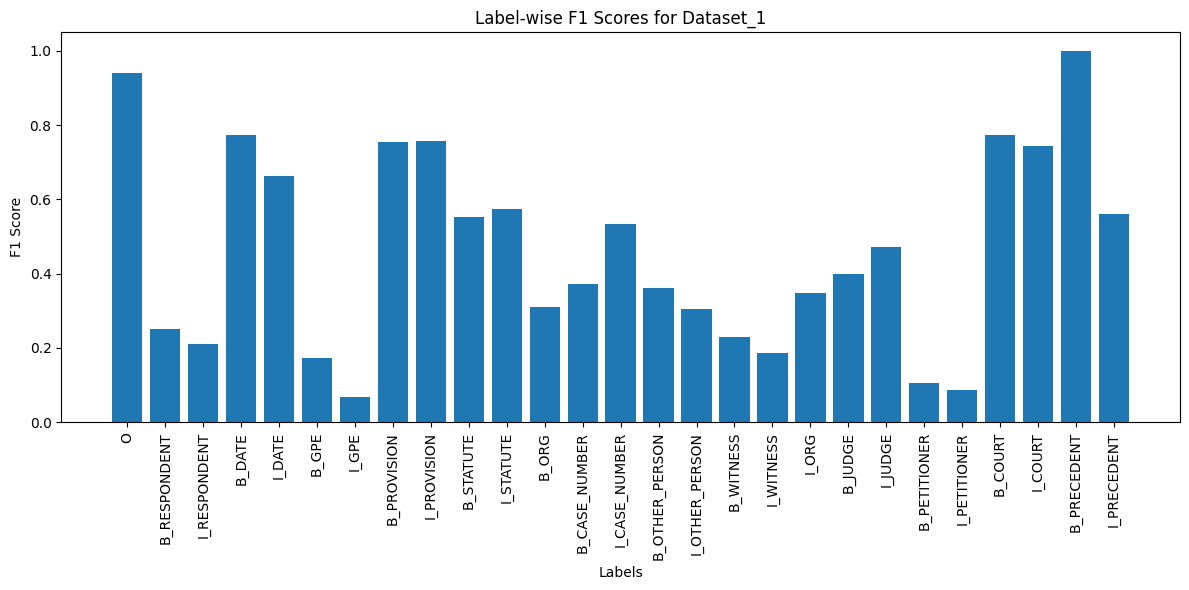

In [30]:
def evaluate_model(model, test_loader, tagset_size):
    all_preds = []
    all_labels = []

    with torch.no_grad():
        model.eval()
        for X, y in test_loader:
            outputs = model(X)
            _, predicted = torch.max(outputs, 2)
            all_preds.extend(predicted.view(-1).cpu().numpy())
            all_labels.extend(y.view(-1).cpu().numpy())

    f1_scores = f1_score(all_labels, all_preds, average=None, labels=list(range(1, tagset_size)), zero_division=1)
    return f1_scores

# Define labels for the plot
labels = ['O', 'B_RESPONDENT', 'I_RESPONDENT', 'B_DATE', 'I_DATE', 'B_GPE', 'I_GPE', 'B_PROVISION', 'I_PROVISION',
          'B_STATUTE', 'I_STATUTE', 'B_ORG', 'B_CASE_NUMBER', 'I_CASE_NUMBER', 'B_OTHER_PERSON', 'I_OTHER_PERSON',
          'B_WITNESS', 'I_WITNESS', 'I_ORG', 'B_JUDGE', 'I_JUDGE', 'B_PETITIONER', 'I_PETITIONER', 'B_COURT', 'I_COURT',
          'B_PRECEDENT', 'I_PRECEDENT']

# Calculate label-wise F1 scores
label_f1_scores = evaluate_model(word2vec_model, test_loader_word2vec, tagset_size)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(labels, label_f1_scores)
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.title('Label-wise F1 Scores for Dataset_1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
for i in range(len(labels)):
    print(f"Label: {labels[i]} F1: {label_f1_scores[i]}")

Label: O F1: 0.9391851785232485
Label: B_RESPONDENT F1: 0.25
Label: I_RESPONDENT F1: 0.21052631578947367
Label: B_DATE F1: 0.773067331670823
Label: I_DATE F1: 0.6633165829145728
Label: B_GPE F1: 0.17167381974248927
Label: I_GPE F1: 0.06779661016949153
Label: B_PROVISION F1: 0.7536945812807881
Label: I_PROVISION F1: 0.7575360419397117
Label: B_STATUTE F1: 0.5529411764705883
Label: I_STATUTE F1: 0.5742251223491027
Label: B_ORG F1: 0.3114754098360656
Label: B_CASE_NUMBER F1: 0.37267080745341613
Label: I_CASE_NUMBER F1: 0.5328596802841918
Label: B_OTHER_PERSON F1: 0.36082474226804123
Label: I_OTHER_PERSON F1: 0.3044982698961938
Label: B_WITNESS F1: 0.23076923076923078
Label: I_WITNESS F1: 0.18604651162790697
Label: I_ORG F1: 0.3470715835140998
Label: B_JUDGE F1: 0.4
Label: I_JUDGE F1: 0.47058823529411764
Label: B_PETITIONER F1: 0.10526315789473684
Label: I_PETITIONER F1: 0.08695652173913043
Label: B_COURT F1: 0.7746031746031746
Label: I_COURT F1: 0.7446043165467626
Label: B_PRECEDENT F1: 1

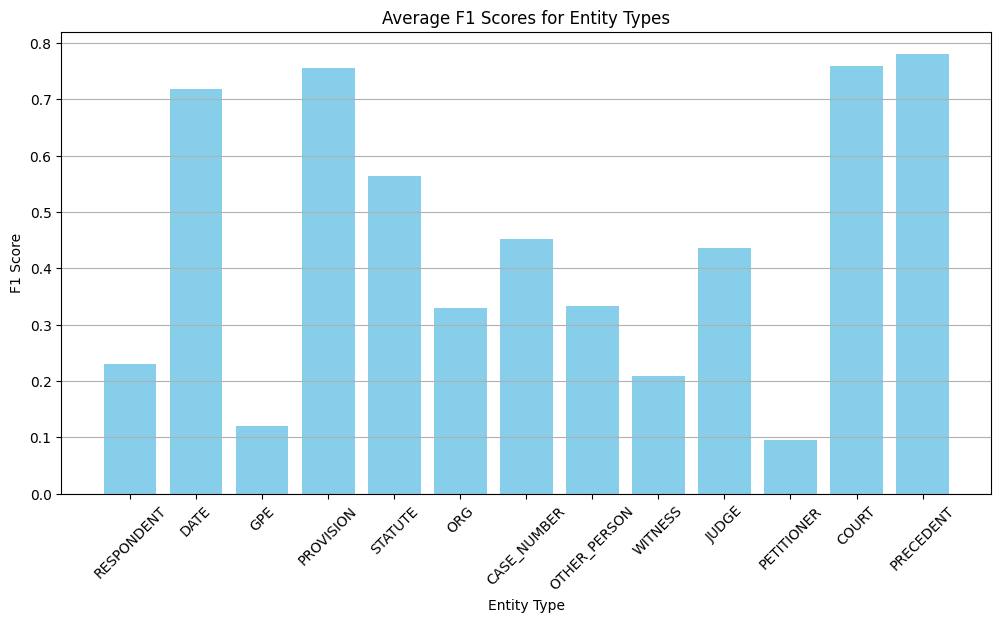

In [32]:
# Initialize dictionaries to store F1 scores for B_label and I_label
b_label_f1 = {}
i_label_f1 = {}

# Calculate average F1 scores for each label
for label in labels[1:]:  # Exclude 'O' label
    if label.startswith('B_'):
        entity = label[2:]
        b_label_f1[entity] = label_f1_scores[labels.index(label)]
    elif label.startswith('I_'):
        entity = label[2:]
        if entity not in i_label_f1:
            i_label_f1[entity] = []
        i_label_f1[entity].append(label_f1_scores[labels.index(label)])
        

# Calculate average F1 scores for each entity type
entity_f1 = {}
for entity in b_label_f1:
    if entity in i_label_f1:
        avg_f1 = (b_label_f1[entity] + np.mean(i_label_f1[entity])) / 2
        entity_f1[entity] = avg_f1
    else:
        entity_f1[entity] = b_label_f1[entity]

# Plot the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(entity_f1.keys(), entity_f1.values(), color='skyblue')
plt.xlabel('Entity Type')
plt.ylabel('F1 Score')
plt.title('Average F1 Scores for Entity Types')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [33]:
entity_f1

{'RESPONDENT': 0.23026315789473684,
 'DATE': 0.7181919572926979,
 'GPE': 0.1197352149559904,
 'PROVISION': 0.75561531161025,
 'STATUTE': 0.5635831494098456,
 'ORG': 0.32927349667508266,
 'CASE_NUMBER': 0.452765243868804,
 'OTHER_PERSON': 0.33266150608211753,
 'WITNESS': 0.20840787119856888,
 'JUDGE': 0.43529411764705883,
 'PETITIONER': 0.09610983981693363,
 'COURT': 0.7596037455749687,
 'PRECEDENT': 0.7806451612903226}